In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plots
%matplotlib inline


In [4]:
#load data
df = pd.read_csv('data/train.csv')

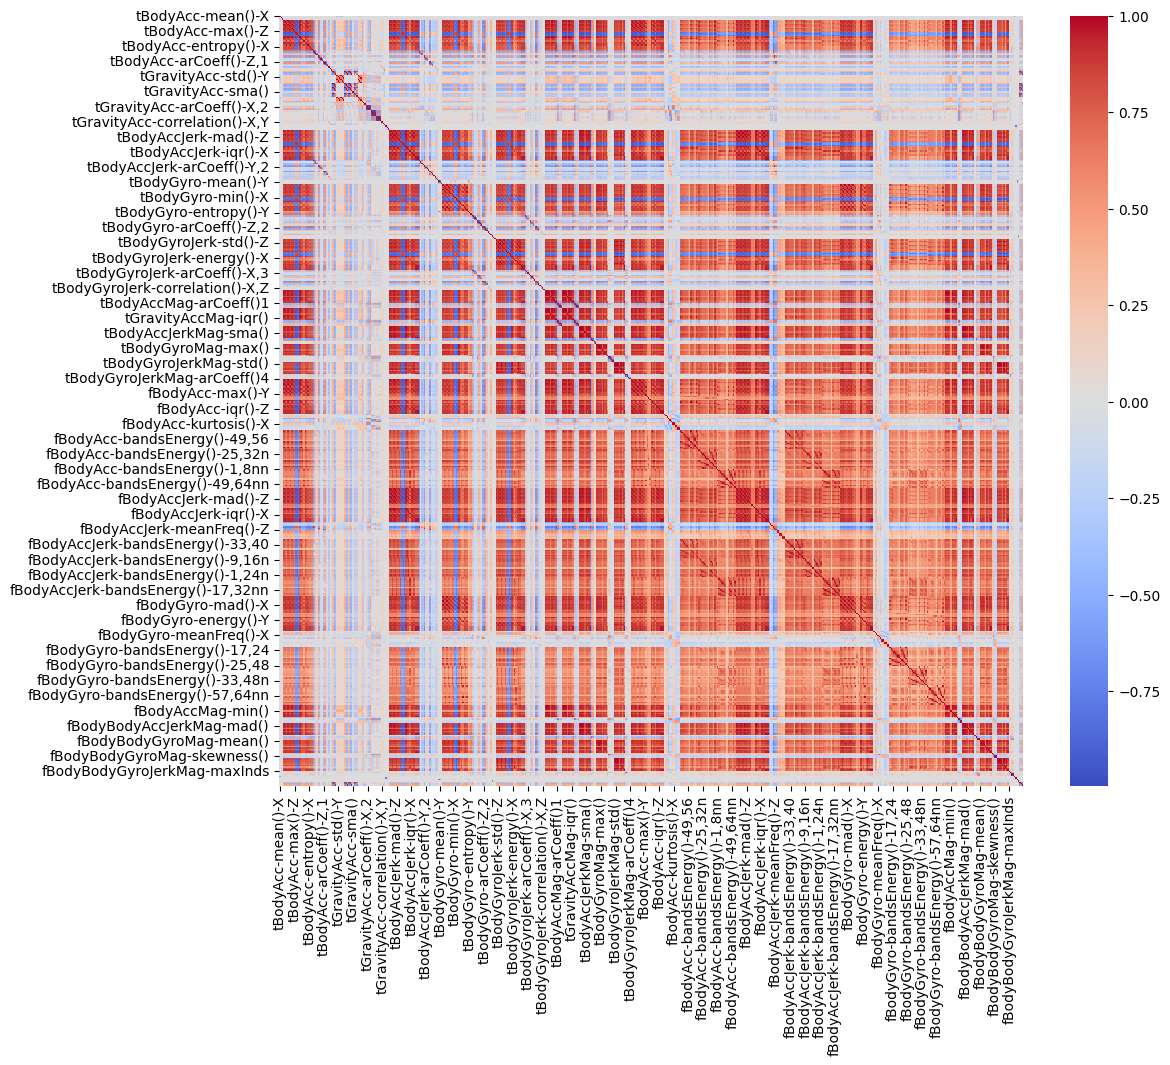

In [15]:
corr_matrix = df.drop(columns=['Activity', 'subject'], errors='ignore').select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

In [16]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]


df_reduced = df.drop(columns=to_drop)
df_reduced = df_reduced.drop(columns=['Activity', 'subject'], errors='ignore')


print(f"Dropped {len(to_drop)} features: {to_drop}")


Dropped 342 features: ['tBodyAcc-std()-Y', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-Y', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Y', 'tGravityAcc-mad()-Z', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z', 'tGravityAcc-energy()-X', 'tGravityAcc-iqr()-X', 'tGravityAcc-iqr()-Y', 'tGravityAcc-iqr()-Z', 'tGravityAcc-arCoeff()-X,3', 'tGravityAcc-arCoeff()-X,4', 'tGravityAcc-arCoeff()-Y,3', 'tGravityAcc-arCoeff()-Y,4', 'tGravityAcc-arCoeff()-Z,3', 'tGravityAcc-arCoeff()-Z,4', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z', 'tBodyAccJerk-mad()-X', 'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-mad()-Z', 'tBodyAccJerk-max()-X', 'tBodyAccJerk-max()-Y', 't

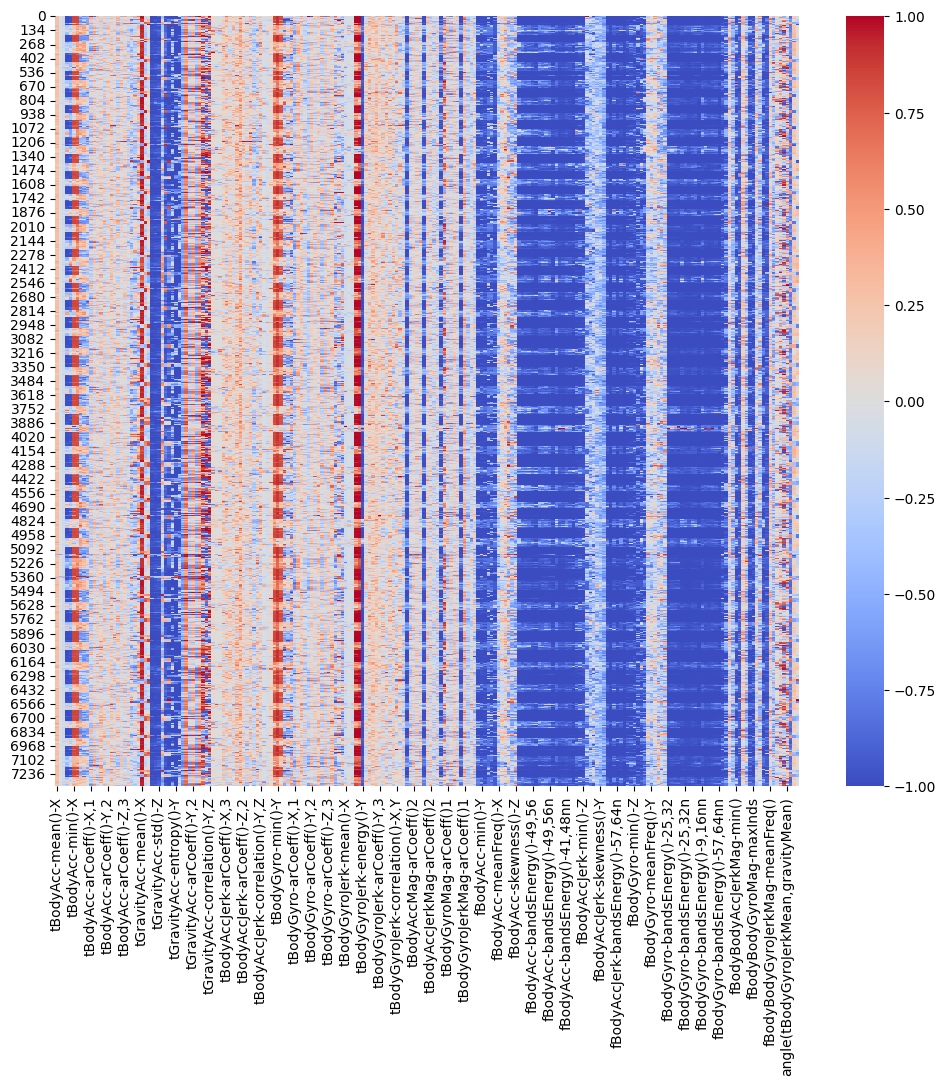

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df_reduced.select_dtypes(include=np.number), cmap='coolwarm', annot=False)
plt.show()

In [19]:
df_reduced.shape[1]

220

Available activity columns: ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


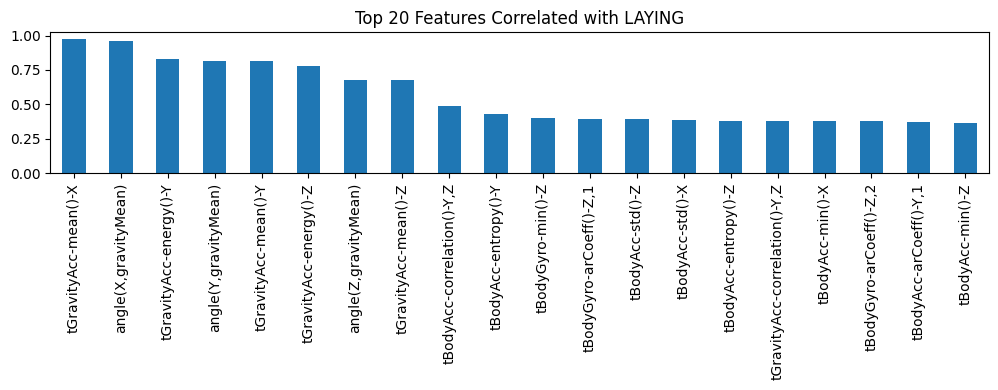

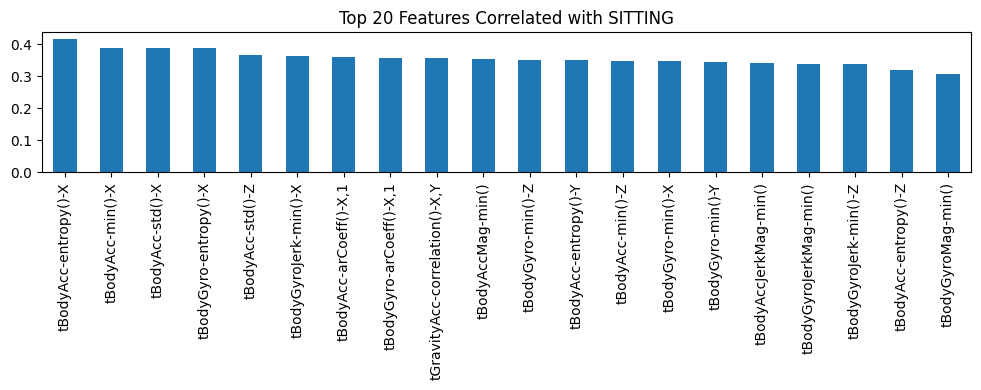

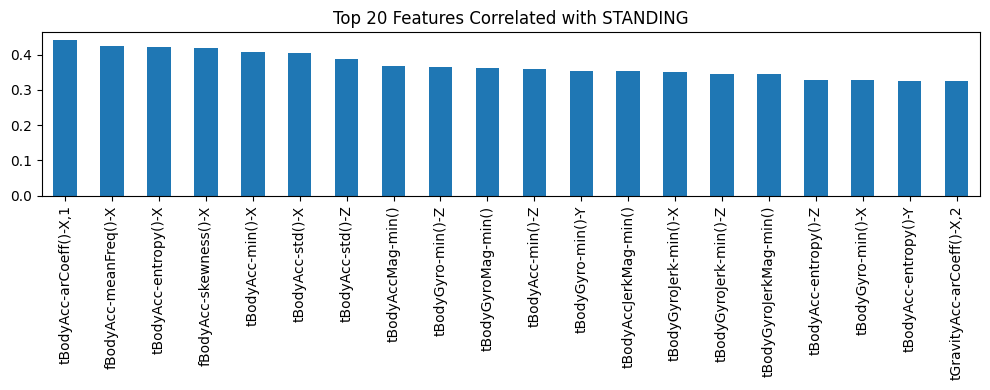

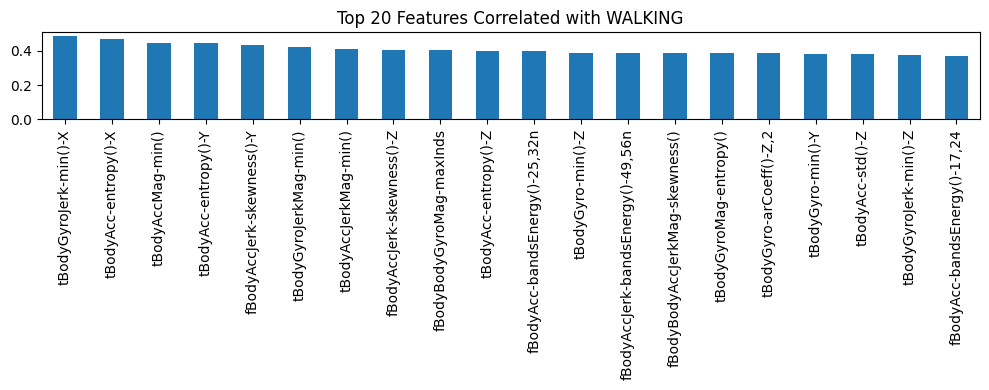

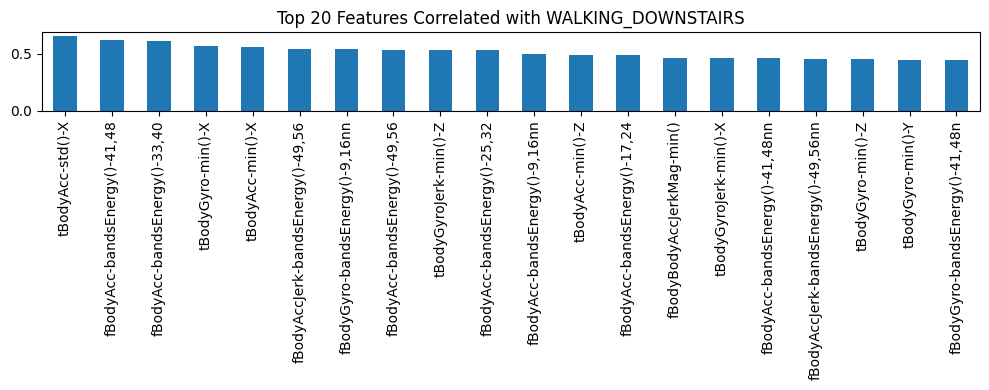

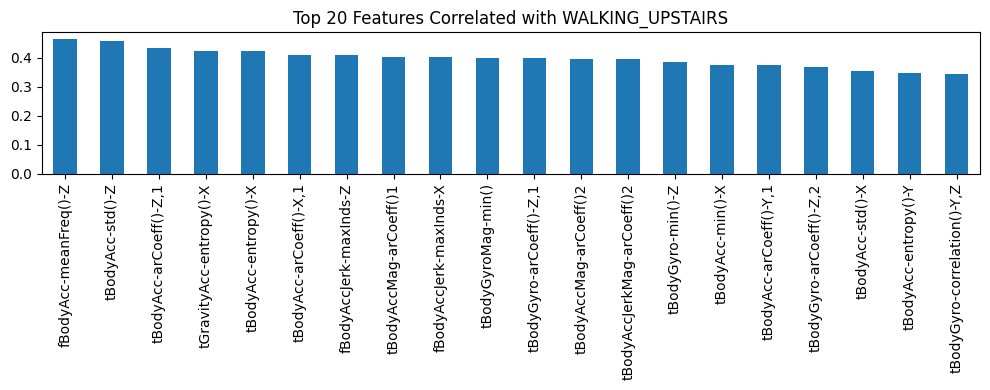

In [20]:
activity_dummies = pd.get_dummies(df_reduced['ActivityName'])
print("Available activity columns:", activity_dummies.columns.tolist())

correlations = {}

for activity in activity_dummies.columns:
  correlations[activity] = df_reduced.drop('ActivityName', axis=1).corrwith(activity_dummies[activity])
  top_corr = correlations[activity].abs().sort_values(ascending=False).head(20)
  plt.figure(figsize=(10, 4))
  top_corr.plot(kind='bar')
  plt.title(f"Top 20 Features Correlated with {activity}")
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()


In [21]:
activity_means = df_reduced.groupby('ActivityName').mean()
activity_variances = activity_means.var().sort_values(ascending=False)

print("Top 30 features to distinguish activites are:")

print(activity_variances.head(30))


Top 30 features to distinguish activites are:
tGravityAcc-mean()-X             0.273657
angle(X,gravityMean)             0.260994
tBodyAcc-std()-X                 0.237083
tBodyAcc-entropy()-X             0.199463
tBodyAcc-entropy()-Y             0.174411
tBodyAcc-std()-Z                 0.172706
tBodyAcc-min()-X                 0.144094
tGravityAcc-energy()-Y           0.141663
tGravityAcc-energy()-Z           0.125792
tBodyGyro-entropy()-Z            0.121145
tGravityAcc-mean()-Y             0.119567
tBodyAcc-entropy()-Z             0.110312
tBodyGyroMag-entropy()           0.101895
tGravityAcc-correlation()-Y,Z    0.099916
tBodyGyro-min()-Z                0.090281
tBodyGyro-entropy()-X            0.082738
tGravityAcc-correlation()-X,Y    0.082162
tBodyAcc-min()-Z                 0.079225
angle(Y,gravityMean)             0.073925
tBodyGyroJerk-min()-X            0.073555
tBodyGyroMag-min()               0.072516
tGravityAcc-mean()-Z             0.070853
tBodyAcc-arCoeff()-X,1        